In [13]:
!pip install gymnasium

In [14]:
import gymnasium as gym
import numpy as np

# Hyperparameters
gamma = 0.99
alpha_actor = 0.001
alpha_critic = 0.01
num_episodes = 500

# Create environment
env = gym.make('CartPole-v1')
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

# Initialize weights
W_actor = np.random.rand(state_dim, action_dim)
W_critic = np.random.rand(state_dim, 1)

# Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# Training loop
for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Actor: Choose action
        action_probs = softmax(np.dot(state, W_actor))
        action = np.random.choice(action_dim, p=action_probs)

        # Take action
        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward

        # Critic: Compute TD error
        value = np.dot(state, W_critic)
        next_value = np.dot(next_state, W_critic) if not done else 0
        td_error = reward + gamma * next_value - value

        # Update critic
        W_critic += alpha_critic * td_error * state.reshape(-1, 1)

        # Update actor
        d_log_pi = action_probs
        d_log_pi[action] -= 1
        W_actor += alpha_actor * td_error * np.outer(state, d_log_pi)

        state = next_state

    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

env.close()


Episode 1: Total Reward = 23.0
Episode 2: Total Reward = 15.0
Episode 3: Total Reward = 19.0
Episode 4: Total Reward = 10.0
Episode 5: Total Reward = 34.0
Episode 6: Total Reward = 54.0
Episode 7: Total Reward = 17.0
Episode 8: Total Reward = 24.0
Episode 9: Total Reward = 35.0
Episode 10: Total Reward = 51.0
Episode 11: Total Reward = 22.0
Episode 12: Total Reward = 11.0
Episode 13: Total Reward = 35.0
Episode 14: Total Reward = 18.0
Episode 15: Total Reward = 16.0
Episode 16: Total Reward = 42.0
Episode 17: Total Reward = 13.0
Episode 18: Total Reward = 23.0
Episode 19: Total Reward = 16.0
Episode 20: Total Reward = 18.0
Episode 21: Total Reward = 16.0
Episode 22: Total Reward = 28.0
Episode 23: Total Reward = 35.0
Episode 24: Total Reward = 9.0
Episode 25: Total Reward = 30.0
Episode 26: Total Reward = 42.0
Episode 27: Total Reward = 23.0
Episode 28: Total Reward = 15.0
Episode 29: Total Reward = 12.0
Episode 30: Total Reward = 19.0
Episode 31: Total Reward = 18.0
Episode 32: Total 

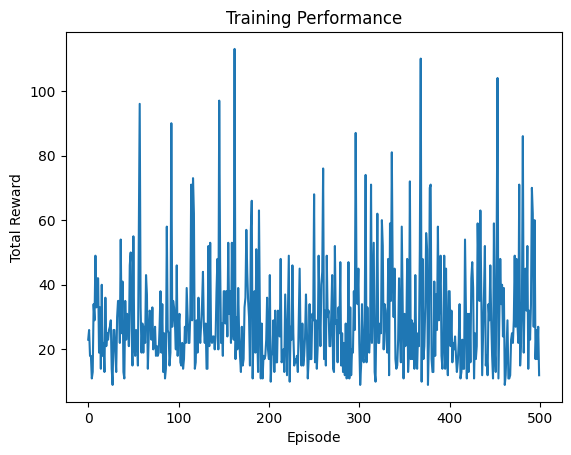

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Store rewards for each episode
rewards = []

# Training loop (with reward storage)
for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Actor: Choose action
        action_probs = softmax(np.dot(state, W_actor))
        action = np.random.choice(action_dim, p=action_probs)

        # Take action
        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward

        # Critic: Compute TD error
        value = np.dot(state, W_critic)
        next_value = np.dot(next_state, W_critic) if not done else 0
        td_error = reward + gamma * next_value - value

        # Update critic
        W_critic += alpha_critic * td_error * state.reshape(-1, 1)

        # Update actor
        d_log_pi = action_probs
        d_log_pi[action] -= 1
        W_actor += alpha_actor * td_error * np.outer(state, d_log_pi)

        state = next_state

    rewards.append(total_reward)
    #print(f"Episode {episode + 1}: Total Reward = {total_reward}")

env.close()

# Plot the rewards over episodes
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Performance")
plt.show()


In [17]:
import numpy as np
# Now let's use the trained model to run the CartPole environment

# Create a new environment for testing
env = gym.make('CartPole-v1', render_mode="human")  # Enable rendering for visualization

# Run the trained agent for a few episodes
for episode in range(10):  # You can change the number of episodes here
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Use the trained actor to choose the action
        action_probs = softmax(np.dot(state, W_actor))
        action = np.random.choice(action_dim, p=action_probs)

        # Take the action in the environment
        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward

        state = next_state

    print(f"Test Episode {episode + 1}: Total Reward = {total_reward}")

env.close()

Test Episode 1: Total Reward = 53.0
Test Episode 2: Total Reward = 47.0
Test Episode 3: Total Reward = 49.0
Test Episode 4: Total Reward = 19.0
Test Episode 5: Total Reward = 43.0
Test Episode 6: Total Reward = 18.0
Test Episode 7: Total Reward = 21.0
Test Episode 8: Total Reward = 56.0
Test Episode 9: Total Reward = 27.0
Test Episode 10: Total Reward = 19.0


In [19]:
num_test_episodes = 100
total_test_rewards = 0

env = gym.make('CartPole-v1')

for episode in range(num_test_episodes):
    state, _ = env.reset()
    done = False
    episode_reward = 0
    while not done:
        action_probs = softmax(np.dot(state, W_actor))
        action = np.random.choice(action_dim, p=action_probs)
        next_state, reward, done, _, _ = env.step(action)
        episode_reward += reward
        state = next_state
    total_test_rewards += episode_reward

average_test_reward = total_test_rewards / num_test_episodes
print(f"Average Reward over {num_test_episodes} test episodes: {average_test_reward}")

# The higher the average reward, the better the trained agent is performing.


Average Reward over 100 test episodes: 28.69
